# 训练并评估模型

In [2]:
import tensorflow as tf
from tensorflow import keras

# load image datas used for trainning
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
model = keras.Sequential()
#输入层:输入数据的 shape 28x28 尺寸的图形
model.add(keras.layers.Flatten(input_shape = (28, 28)))
#中间层:128个神经元, 并指定 激活函数为 relu()
model.add(keras.layers.Dense(128, activation = tf.nn.relu))
#输出层:10个类别(神经元), 并指定激活函数为 softmax()
model.add(keras.layers.Dense(10, activation = tf.nn.softmax))

In [4]:
# 模型的样子
# 28 * 28 = 784pixels
# 784pixels * 128 neurons = 100352
# (784 + 1bias) * 128 = 100480
# (128 + 1) * 10 = 1290
# model.summary()

In [5]:
# train
# 使 train data 转化为 0~1 之间的数据, 有助于提高训练效果
train_images=train_images/255

# 指定 优化方法  loss_function  并显示精度
# adam 优化方法是很常用的, 尤其当输出结果是类别 类别判断
# sparse_categorical_crossentropy or categorical_crossentropy
# train_labels[0] 这种 只有整数的  train_data, 并且只有一个数据是1, 另特别称为 one-hot,类别为1
#model.compile(optimizer='adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# start trainning, 5 times
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.5003 - accuracy: 0.8240
Epoch 2/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3759 - accuracy: 0.8643
Epoch 3/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3362 - accuracy: 0.8781
Epoch 4/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3122 - accuracy: 0.8861
Epoch 5/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2942 - accuracy: 0.8919


In [5]:
# evaluate model
test_images_scaled=test_images/255 # 因为上面的train_images / 255 了
model.evaluate(test_images_scaled, test_labels)

# 对比train的loss & accuracy, evaluate得到的 loss & accuracy 都有所降低
# 但相差不大, 说明 train 的效果还可以

10000/10000 [==============================] - ETA: 0s - loss: 0.3670 - accuracy: 0.86 - 0s 43us/sample - loss: 0.3650 - accuracy: 0.8699


[0.36495736770629883, 0.8699]

## 预测
0:T-shirt/top
1:Trouser/pants
2:Pullover shirt
3:Dress
4:coat
5:Sandai
6:Shirt
7:Sneaker
8:Bag
9:Ankie boot

In [6]:
# 预测第一张图片的类别
#外围的[]是输入参数的类型要求
model.predict([[test_images[0]/255]])

array([[4.9066234e-06, 4.8823644e-08, 1.5799533e-07, 1.2243399e-07,
        6.0317944e-07, 2.6812049e-04, 2.8692391e-06, 4.1726489e-02,
        8.3289742e-05, 9.5791346e-01]], dtype=float32)

可见输出结果并不是很直观,但是数值最大的元素那一项即是预测值.
我们可以用 `numpy` 来使得结果更加直观.

predict label:  9
real label:  9
show image:


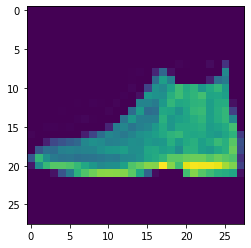

In [8]:
import numpy as np
import matplotlib.pyplot as plt
print("predict label: ", np.argmax(model.predict([[test_images[0]/255]])))
print("real label: ", test_labels[0])

print("show image:")
plt.imshow(test_images[0])